In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("./forest_dataset.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [2]:
new_cols = """Elevation / quantitative /meters / Elevation in meters
Aspect / quantitative / azimuth / Aspect in degrees azimuth
Slope / quantitative / degrees / Slope in degrees
Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation""".split("\n")


new_cols = list(map(lambda x: x.split(" / ")[0], new_cols))
print(new_cols)
unique_cols = new_cols[:new_cols.index('Wilderness_Area (4 binary columns)')]
wild_a = [f"Wilderness_Area_par_{i}" for i in range(1, 5)]
soil_type_columns = [f"Soil_Type_{i}" for i in range(1, 41)]
target_col = ["Cover_Type"]

new_cols = unique_cols + wild_a + soil_type_columns + target_col


['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area (4 binary columns)', 'Soil_Type (40 binary columns)', 'Cover_Type (7 types)']


In [3]:

data.columns = new_cols

data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [4]:
labels = data[data.columns[-1]].values
feature_matrix = data[data.columns[:-1]].values

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()


In [7]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
feature_matrix, labels, test_size=0.2, random_state=42)

In [8]:
clf = LogisticRegression(C=2, max_iter=1000, penalty="l1", solver="saga")
# обучение модели
clf.fit(train_feature_matrix, train_labels)
# предсказание на тестовой выборке
y_pred = clf.predict(test_feature_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
accuracy_score(test_labels, y_pred)

0.6645

In [10]:
clf = LogisticRegression(solver="saga")

param_grid = {
    "C": np.arange(1, 5),
    "penalty": ["l1", "l2"]
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring="accuracy")

search.fit(feature_matrix, labels)

print(search.best_params_)



{'C': 2, 'penalty': 'l1'}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [15]:
clf = KNeighborsClassifier()

clf.fit(train_feature_matrix, train_labels)

y_pred = clf.predict(test_feature_matrix)

accuracy_score(test_labels, y_pred)



0.7365

In [20]:
params = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "metric":  ['manhattan', 'euclidean'],
    "weights": ["uniform", "distance"]
}

search = GridSearchCV(clf, params, n_jobs=-1, cv=5, scoring="accuracy")

search.fit(feature_matrix, labels)

print(search.best_params_)


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [25]:
optimal_params = search.best_params_
optimal_clf = KNeighborsClassifier(**optimal_params)
optimal_clf.fit(test_feature_matrix, test_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)
print(pred_prob)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


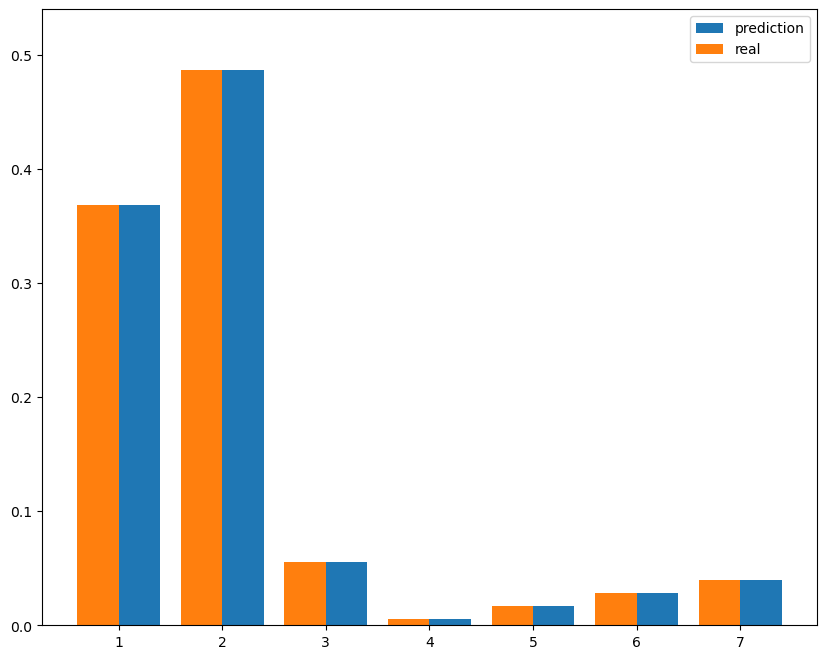

[0.368, 0.4865, 0.0555, 0.0055, 0.0165, 0.028, 0.04]


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()
print(freq)